In [2]:
from __future__ import division
import numpy as np
import nibabel as nb
from ipywidgets import interact
from ipywidgets import widgets
import matplotlib.pyplot as plt
import scipy.ndimage
import tqdm
import glob
import os
%matplotlib inline

In [3]:
def plot_three(img, x, y, z, cmap=plt.cm.gray):
    fig = plt.figure(figsize=(20, 20)) 
    plt.subplot(1, 3, 1)
    plt.imshow(np.rot90(img[:, :, z]),
                        cmap=cmap,
                        interpolation='none'
                        )
    plt.subplot(1, 3, 2)
    plt.imshow(np.rot90(img[:, y, :]),
                        cmap=cmap,
                        interpolation='none'
                        )
    plt.subplot(1, 3, 3)
    plt.imshow(np.rot90(img[x, :, :]),
                        cmap=cmap,
                        interpolation='none'
              )

In [4]:
def show_image(path, x, y, z):
    img = nb.load(path).get_data()[..., 0]
    limits = (0, 2000)
    plot_three(img, x, y, z)
    mask = np.zeros_like(img, dtype=bool)
    mask[10:160, 120:190, 45:160] = 1
    img[~mask] = 0
    plot_three(img, x, y, z)
    segmentation_seed = np.zeros(img.shape, dtype=np.uint8)
    #segmentation_seed[img == 0] = 1
    #segmentation_seed[np.logical_and(img > 0, img < 300)] = 2
    segmentation_seed[np.logical_and(img > 650, img < 1000)] = 3
    segmentation_seed[np.logical_and(img > 1000, img < 1450)] = 4     
    plot_three(segmentation_seed, x, y, z)
    plt.figure()
    plt.hist(img[img > 0].flatten(), bins=256)
    plt.yscale('log', nonposy='clip')

In [5]:
def show_atlas(path, x, y, z):
    atlas = nb.load("../data/IIT_GM_Desikan_atlas.nii.gz").get_data()
    atlas[atlas > 60] = 100 # cortex = 100
    plot_three(atlas, x, y, z, cmap=plt.cm.Accent)
    img = nb.load(path).get_data()[..., 0]
    plot_three(img, x, y, z)

shape = (176, 208, 176)
path = widgets.Text("../data/set_train/train_1.nii")
interact(
    show_atlas,
    path=path,
    x=widgets.IntSlider(min=0, max=shape[0] - 1, step=1, value=shape[0] // 2),
    y=widgets.IntSlider(min=0, max=shape[1] - 1, step=1, value=shape[1] // 2),
    z=widgets.IntSlider(min=0, max=shape[2] - 1, step=1, value=shape[2] // 2),
);

FileNotFoundError: No such file: '../data/IIT_GM_Desikan_atlas.nii.gz'

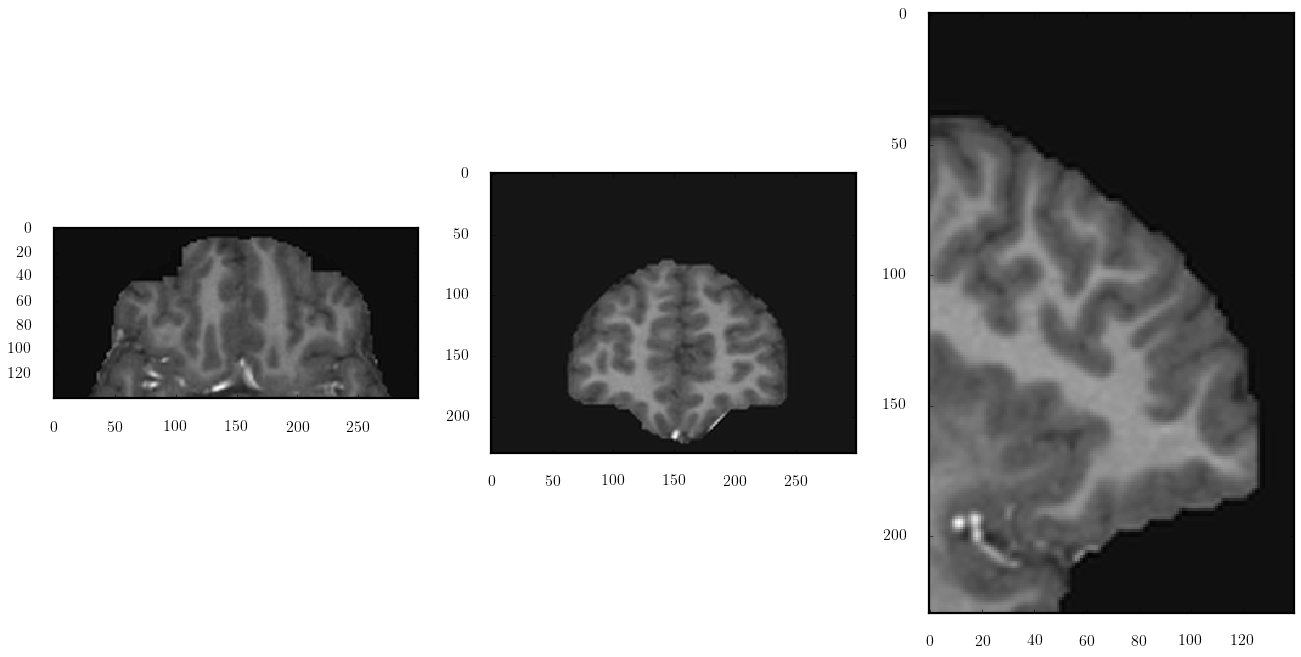

In [8]:
def show_interpolated(path, x, y, z):
    img = nb.load(path).get_data()[10:160, 120:190, 45:160, 0]
    plot_three(scipy.ndimage.interpolation.zoom(img, 2), x, y, z)

path = widgets.Text("../data/set_train/train_1.nii")
interact(
    show_interpolated,
    path=path,
    x=widgets.IntSlider(min=0, max=shape[0] - 1, step=1, value=shape[0] // 2),
    y=widgets.IntSlider(min=0, max=shape[1] - 1, step=1, value=shape[1] // 2),
    z=widgets.IntSlider(min=0, max=shape[2] - 1, step=1, value=shape[2] // 2),
);